# 1   Computing with Language: Texts and Words
## 1.1   Getting Started with Python

In [1]:
print("hello python")

hello python


## 1.2   Getting Started with NLTK

**Natural Language Toolkit**

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”

Reference: 
1. [NLTK Website](http://www.nltk.org/).
2. [Online NLTK Book Python 3](http://nltk.org/book).



In [2]:
import nltk
# nltk.download()

Then, the following GUI will appear for your downloading.

Downloading the NLTK Book Collection: browse the available packages using `nltk.download()`. 

The Collections tab on the downloader shows how the packages are grouped into sets, and you should select the line labeled book to obtain all data required for the examples and exercises in this practice. 

It consists of about 30 compressed files requiring about 100Mb disk space. The full collection of data (i.e., all in the downloader) is nearly ten times this size (at the time of writing) and continues to expand.

Once the data is downloaded to your machine, you can load some of it using the Python interpreter.

![nltk_download](../images/nltk_download_gui.png)

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

## 1.3   Searching Text
There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick by entering text1 followed by a period, then the term concordance, and then placing "monstrous" in parentheses:

In [6]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the ___ pictures and a ___ size . What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [7]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [8]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [9]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. 

This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text.

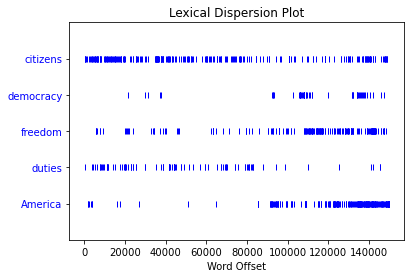

In [10]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term generate

In [11]:
text3.generate()

Building ngram index...
laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

## 1.4   Counting Vocabulary
The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. 


In [12]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group.

When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. 

Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. 

How many distinct words does the book of Genesis contain? 

To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together.

In [16]:
sorted(set(text3))[:20] 

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech']

By wrapping `sorted()` around the Python expression `set(text3)` , we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. 
All capitalized words precede lowercase words. 

In [17]:
len(set(text3))

2789

Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." 

A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. 


Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average 

In [18]:
len(set(text3)) / len(text3)

0.06230453042623537

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [19]:
text3.count("smote")
100 * text4.count('a') / len(text4)

1.457973123627309

In [20]:
type(text3)

nltk.text.Text

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. 

In [21]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [22]:
lexical_diversity(text3)

0.06230453042623537

In [23]:
lexical_diversity(text5)

0.13477005109975562

In [24]:
percentage(4, 5)

80.0

In [25]:
percentage(text4.count('a'), len(text4))

1.457973123627309

# 2   A Closer Look at Python: Texts as Lists of Words

## 2.1   Lists
What is a text? At one level, it is a sequence of symbols on a page such as this one. At another level, it is a sequence of chapters, made up of a sequence of sections, where each section is a sequence of paragraphs, and so on. However, for our purposes, we will think of a text as nothing more than a sequence of words and punctuation. 

In [26]:
sent1 = ['Call', 'me', 'Ishmael', '.']
sent1

['Call', 'me', 'Ishmael', '.']

In [27]:
len(sent1)

4

In [28]:
lexical_diversity(sent1)

1.0

In [29]:
sent2

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [30]:
sent3

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

In [31]:
['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail']

['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']

In [32]:
sent4 + sent1

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Call',
 'me',
 'Ishmael',
 '.']

In [33]:
sent1.append("Some")
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

## 2.2   Indexing Lists
A text in Python is a list of words, represented using a combination of brackets and quotes.
Analogously, we can identify the elements of a Python list by their order of occurrence in the list. The number that represents this position is the item's index. 

In [34]:
text4[173]

'awaken'

In [35]:
text4.index('awaken')

173

Indexes are a common way to access the words of a text, or, more generally, the elements of any list. Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as slicing.

In [36]:
text5[16715:16735]

['U86',
 'thats',
 'why',
 'something',
 'like',
 'gamefly',
 'is',
 'so',
 'good',
 'because',
 'you',
 'can',
 'actually',
 'play',
 'a',
 'full',
 'game',
 'without',
 'buying',
 'it']

In [37]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9', 'word10']
sent[0]

'word1'

In [38]:
sent[9]

'word10'

**Notice that our indexes start from zero: sent element zero, written `sent[0]`, is the first word, `'word1'`, whereas sent element 9 is `'word10'`.**

In [39]:
sent[10]

IndexError: list index out of range

This time it is not a syntax error, because the program fragment is syntactically correct. Instead, it is a runtime error, and it produces a Traceback message that shows the context of the error, followed by the name of the error, IndexError, and a brief explanation.

In [40]:
sent[5:8]

['word6', 'word7', 'word8']

In [41]:
sent[5]

'word6'

In [42]:
sent[6]

'word7'

In [43]:
sent[7]

'word8'

By convention, `m:n` means elements `m, …, n-1`. 

In [44]:
sent[:3]

['word1', 'word2', 'word3']

In [45]:
sent[7:]

['word8', 'word9', 'word10']

We can modify an element of a list by assigning to one of its index values.

In [46]:
sent[0] = 'First'
sent[9] = 'Last'
len(sent)

10

In [47]:
sent[1:9]=['Second','Third'] # replace an entire slice with new materials
sent 

['First', 'Second', 'Third', 'Last']

## 2.3   Variables


In [48]:
sent1 = ['Call', 'me', 'Ishmael', '.']

Such lines have the form: variable = expression. 

Python will evaluate the expression, and save its result to the variable. 

This process is called **assignment**. It does not generate any output; you have to type the variable on a line of its own to inspect its contents. 

The equals sign is slightly misleading, since information is moving from the right side to the left. It might help to think of it as a `left-arrow`. The name of the variable can be anything you like, e.g., my_sent, sentence, xyzzy. It must start with a letter, and can include numbers and underscores.

In [49]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode', 'forth', 'from', 'Camelot', '.']
noun_phrase = my_sent[1:4]
noun_phrase

['bold', 'Sir', 'Robin']

In [50]:
wOrDs = sorted(noun_phrase)
wOrDs

['Robin', 'Sir', 'bold']

Remember that capitalized words appear before lowercase words in sorted lists.

Python does not try to make sense of the names; it blindly follows your instructions, and does not object if you do something confusing, such as `one = 'two'` or `two = 3`. 

The only restriction is that a variable name cannot be any of Python's reserved words, such as def, if, not, and import. If you use a reserved word, Python will produce a syntax error:

In [51]:
not = 'Camelot'           

SyntaxError: invalid syntax (<ipython-input-51-ccfe97f8cd6e>, line 1)

We will often use variables to hold intermediate steps of a computation, especially when this makes the code easier to follow. Thus `len(set(text1))` could also be written:

In [52]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

19317

Take care with your choice of names (or identifiers) for Python variables. First, you should start the name with a letter, optionally followed by digits (0 to 9) or letters. 

Thus, `abc23` is fine, but `23abc` will cause a syntax error. 

Names are `case-sensitive`, which means that `myVar` and `myvar` are distinct variables. 

Variable names cannot contain whitespace, but you can separate words using an underscore, e.g., my_var. 

Be careful not to insert a hyphen instead of an underscore: `my-var` is wrong, since Python interprets the "-" as a minus sign.

## 2.4   Strings
Some of the methods we used to access the elements of a list also work with individual words, or strings. 


In [53]:
name = 'Monty' 

In [54]:
name[0]

'M'

In [55]:
name[:4]

'Mont'

In [56]:
name * 2

'MontyMonty'

In [57]:
name + '!'

'Monty!'

In [58]:
' '.join(['Monty', 'Python'])

'Monty Python'

In [59]:
'Monty Python'.split()

['Monty', 'Python']

# 3   Computing with Language: Simple Statistics
We began this discussion in 1, and saw how to search for words in context, how to compile the vocabulary of a text, how to generate random text in the same style, and so on.

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text.

In [60]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens[-2:]

['said', 'than']

## 3.1   Frequency Distributions

How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book.

The tally would need thousands of rows, and it would be an exceedingly laborious process — so laborious that we would rather assign the task to a machine.

In [61]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [62]:
fdist1.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

In [63]:
fdist1['whale']

906

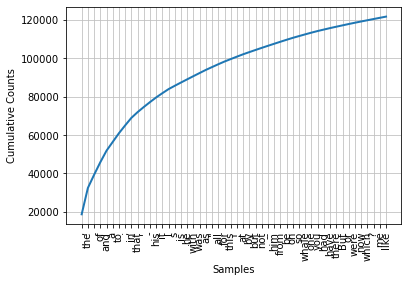

In [64]:
fdist1.plot(50, cumulative=True)

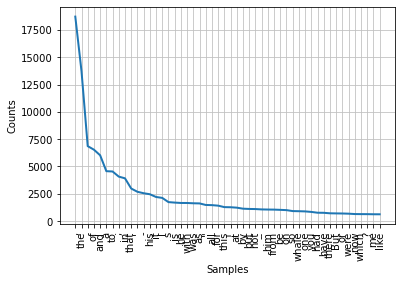

In [65]:
fdist1.plot(50, cumulative=False)

In [66]:
len(fdist1.hapaxes())

9002

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing `fdist1.hapaxes()`. 

This list contains lexicographer, cetological, contraband, expostulations, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

## 3.2   Fine-grained Selection of Words

For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property `P`, so that `P(w)` is true if and only if w is more than 15 characters long. 

- {w | w ∈ V & P(w)}
- Coding: 
```python
[w for w in V if p(w)]
```
Note that it produces a list, not a set, which means that duplicates are possible.

In [67]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]


In [68]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

## 3.3   Collocations and Bigrams
A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function `bigrams()`:


In [69]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [70]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; Old World; Almighty God; Fellow citizens; Chief
Magistrate; every citizen; one another; fellow Americans; Indian
tribes; public debt; foreign nations


Here we see that the pair of words than-done is a bigram, and we write it in Python as ('than', 'done'). Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words.

## 3.4   Counting Other Things

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:

In [72]:
[len(w) for w in text1][:10]

[1, 4, 4, 2, 6, 8, 4, 1, 9, 1]

In [74]:
fdist = FreqDist(len(w) for w in text1)  
fdist

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [75]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [76]:
fdist.freq(3)

0.19255882431878046

# 4   Back to Python: Making Decisions and Taking Control
So far, our little programs have had some interesting qualities: the ability to work with language, and the potential to save human effort through automation. A key feature of programming is the ability of machines to make decisions on our behalf, executing instructions when certain conditions are met, or repeatedly looping through text data until some condition is satisfied. This feature is known as control, and is the focus of this section.

## 4.1   Conditionals


In [77]:
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [78]:
[w for w in sent7 if len(w) < 4]

[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']

In [79]:
[w for w in sent7 if len(w) <= 4]

[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']

In [80]:
[w for w in sent7 if len(w) == 4]

['will', 'join', 'Nov.']

In [81]:
[w for w in sent7 if len(w) != 4]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 '29',
 '.']

There is a common pattern to all of these examples: `w for w in text if condition `, where condition is a Python "test" that yields either true or false. In the cases shown in the previous code example, the condition is always a numerical comparison.

In [82]:
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [83]:
sorted(term for term in set(text4) if 'gnt' in term)

['Sovereignty', 'sovereignties', 'sovereignty']

In [85]:
sorted(item for item in set(text6) if item.istitle())[:10]

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh']

In [86]:
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

In [87]:
sorted(w for w in set(text7) if '-' in w and 'index' in w)

['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [88]:
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)

['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [89]:
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

## 4.2   Operating on Every Element

These expressions have the form [f(w) for ...] or [w.f() for ...], where f is a function that operates on a word to compute its length, or to convert it to uppercase. For now, you don't need to understand the difference between the notations f(w) and w.f().


The notation just described is called a "list comprehension." This is our first example of a Python idiom, a fixed notation that we use habitually without bothering to analyze each time. Mastering such idioms is an important part of becoming a fluent Python programmer.


In [92]:
[len(w) for w in text1][:15]

[1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4]

In [96]:
len(set(text1))

19317

In [93]:
len(set(word.lower() for word in text1))

17231

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000 off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count by filtering out any non-alphabetic items:

In [95]:
len(set(word.lower() for word in text1 if word.isalpha()))

16948

## 4.3   Nested Code Blocks
Most programming languages permit us to execute a block of code when a conditional expression, or if statement, is satisfied. 

In [97]:
word = 'cat'
if len(word) < 5:
    print('word length is less than 5')

word length is less than 5


In [98]:
for word in ['Call', 'me', 'Ishmael', '.']: 
    print(word)

Call
me
Ishmael
.


##  4.4   Looping with Conditions
Now we can combine the if and for statements. We will loop over every item of the list, and print the item only if it ends with the letter l. We'll pick another name for the variable to demonstrate that Python doesn't try to make sense of variable names.



In [100]:
sent1 = ['Call', 'me', 'Ishmael', '.']
for xyzzy in sent1:
    if xyzzy.endswith('l'):
        print(xyzzy)

Call
Ishmael


In [101]:
for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')
    elif token.istitle():
         print(token, 'is a titlecase word')
    else:
        print(token, 'is punctuation')
 

Call is a titlecase word
me is a lowercase word
Ishmael is a titlecase word
. is punctuation


In [102]:
tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
for word in tricky:
    print(word, end=' ')

ancient ceiling conceit conceited conceive conscience conscientious conscientiously deceitful deceive deceived deceiving deficiencies deficiency deficient delicacies excellencies fancied insufficiency insufficient legacies perceive perceived perceiving prescience prophecies receipt receive received receiving society species sufficient sufficiently undeceive undeceiving

# 5 Automatic Natural Language Understanding

We have been exploring language bottom-up, with the help of texts and the Python programming language. However, we're also interested in exploiting our knowledge of language and computation by building useful language technologies. We'll take the opportunity now to step back from the nitty-gritty of code in order to paint a bigger picture of natural language processing.

At a purely practical level, we all need help to navigate the universe of information locked up in text on the Web.

Search engines have been crucial to the growth and popularity of the Web, but have some shortcomings. It takes skill, knowledge, and some luck, to extract answers to such questions as: 
- What tourist sites can I visit between Philadelphia and Pittsburgh on a limited budget? 
- What do experts say about digital SLR cameras? 
- What predictions about the steel market were made by credible commentators in the past week? 

Getting a computer to answer them automatically involves a range of language processing tasks, including information extraction, inference, and summarization, and would need to be carried out on a scale and with a level of robustness that is still beyond our current capabilities.

On a more philosophical level, a long-standing challenge within artificial intelligence has been to build intelligent machines, and a major part of intelligent behaviour is understanding language. 

For many years this goal has been seen as too difficult. However, as NLP technologies become more mature, and robust methods for analyzing unrestricted text become more widespread, the prospect of natural language understanding has re-emerged as a plausible goal.

5.1   Word Sense Disambiguation

In word sense disambiguation we want to work out which sense of a word was intended in a given context. 

5.2   Pronoun Resolution
A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. 

5.3   Generating Language Output
If we can automatically solve such problems of language understanding, we will be able to move on to tasks that involve generating language output, such as question answering and machine translation.

5.4   Machine Translation

For a long time now, machine translation (MT) has been the holy grail of language understanding, ultimately seeking to provide high-quality, idiomatic translation between any pair of languages. Its roots go back to the early days of the Cold War, when the promise of automatic translation led to substantial government sponsorship, and with it, the genesis of NLP itself.

Machine translation is difficult because a given word could have several possible translations (depending on its meaning), and because word order must be changed in keeping with the grammatical structure of the target language. Today these difficulties are being faced by collecting massive quantities of parallel texts from news and government websites that publish documents in two or more languages. 

Given a document in German and English, and possibly a bilingual dictionary, we can automatically pair up the sentences, a process called text alignment. 

Once we have a million or more sentence pairs, we can detect corresponding words and phrases, and build a model that can be used for translating new text.

5.5   Spoken Dialog Systems

In the history of artificial intelligence, the chief measure of intelligence has been a linguistic one, namely the Turing Test: can a dialogue system, responding to a user's text input, perform so naturally that we cannot distinguish it from a human-generated response? In contrast, today's commercial dialogue systems are very limited, but still perform useful functions in narrowly-defined domains.

Dialogue systems give us an opportunity to mention the commonly assumed pipeline for NLP.



5.6   Textual Entailment

The challenge of language understanding has been brought into focus in recent years by a public "shared task" called Recognizing Textual Entailment (RTE). The basic scenario is simple. Suppose you want to find evidence to support the hypothesis: Sandra Goudie was defeated by Max Purnell, and that you have another short text that seems to be relevant, for example, Sandra Goudie was first elected to Parliament in the 2002 elections, narrowly winning the seat of Coromandel by defeating Labour candidate Max Purnell and pushing incumbent Green MP Jeanette Fitzsimons into third place. Does the text provide enough evidence for you to accept the hypothesis? In this particular case, the answer will be "No." You can draw this conclusion easily, but it is very hard to come up with automated methods for making the right decision. 




5.7   Limitations of NLP

Despite the research-led advances in tasks like RTE, natural language systems that have been deployed for real-world applications still cannot perform common-sense reasoning or draw on world knowledge in a general and robust manner. 
